# Data 620 - Week 8 Assignment (High Frequency Words)

Baron Curtin, Heather Geiger

In [20]:
# load libraries
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import regexp_tokenize

# jupyter set up
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## Choose a Corpus of Interest
The dataset we decided to go with is a corpus of headlines from *The Examiner*. *The Examiner* is a "click-bait" news site
that innately draws its visitors from its headlines. The headlines must be interesting enough or controversial enough to
reel in views. The dataset contains headlines from 2010-2015 and is formatted in two columns, date and headline.

[The Examiner Dataset](https://www.kaggle.com/therohk/examine-the-examiner#examiner-date-text.csv)

In [21]:
# read in data
data = pd.read_csv('./examiner-date-text.csv')

### Exploratory Analysis

In [22]:
data.head()

data.tail()

,publish_date,headline_text
0,20100101,100 Most Anticipated books releasing in 2010
1,20100101,10 best films of 2009 - What's on your list?
2,20100101,10 days of free admission at Lan Su Chinese Ga...
3,20100101,10 PlayStation games to watch out for in 2010
4,20100101,10 resolutions for a Happy New Year for you an...


,publish_date,headline_text
3089776,20151231,"Which is better investment, Lego bricks or gol..."
3089777,20151231,Wild score three unanswered goals to defeat th...
3089778,20151231,"With NASA and Russia on the sidelines, Europe ..."
3089779,20151231,"Wolf Pack battling opponents, officials on the..."
3089780,20151231,Writespace hosts all genre open mic night


In [23]:
rows, cols = data.shape

data.info()

print('\n')
print(f'There are {rows:,} headlines in this dataset')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089781 entries, 0 to 3089780
Data columns (total 2 columns):
publish_date     int64
headline_text    object
dtypes: int64(1), object(1)
memory usage: 47.1+ MB


There are 3,089,781 headlines in this dataset


## How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
For this step, we will first need to tokenize all of the headlines. We will take the approach of tokenize each cell in the dataframe
as well as creating a single variable that has all of the different headlines and tokenize that.

We are defining unique tokens to be any single word, as well single punctuation marks, but only exclamations and questions.
For a click-bait news site, these punctuations would draw more attention than a period or a hyphen.

### Tokenize Headlines

In [42]:
# lets first convert the datestring to an actual date
token_df = data.copy()
token_df['date'] = pd.to_datetime(token_df['publish_date'], format='%Y%m%d')
token_df['day'] = token_df['date'].dt.day
token_df['month'] = token_df['date'].dt.month
token_df['year'] = token_df['date'].dt.year

In [43]:
# regex pattern for tokenizing words and aforementioned punctuation (?!)
pattern = r'\w+|[\?!]'

token_df['tokens'] = token_df['headline_text'].apply(lambda x: regexp_tokenize(str(x).lower(), pattern))
token_df['counted_tokens'] = token_df['tokens'].apply(lambda x: Counter(x))

In [44]:
# create single variable with all headlines
# lowercase all tokens to ensure consistency
all_headlines = token_df['headline_text'].str.lower().str.cat(sep=' ')
all_words = regexp_tokenize(all_headlines, pattern)

In [45]:
# use counter class to count all tokens
unique_tokens = set(all_words)
counted_tokens = Counter(all_words)

In [46]:
print(f'The total amount of unique tokens in this corpus is: {len(unique_tokens):,}')

The total amount of unique tokens in this corpus is: 250,178


## Taking the most common words, how many unique words represent half of the total words in the corpus?
For this step, we can take our counter object, pass it to a Pandas dataframe, and use cumulative sum to determine the 50%
mark.

In [47]:
# pass counter object to dataframe
counted_tokens_df = pd.DataFrame.from_dict(counted_tokens, orient='index').reset_index()
counted_tokens_df.columns = ['token', 'ct']
counted_tokens_df = counted_tokens_df.sort_values('ct', ascending=False)

In [99]:
# generate cumulative sum and relative frequency columns
counted_tokens_df['cumulative_count'] = counted_tokens_df['ct'].cumsum()
counted_tokens_df['relative_frequency'] = counted_tokens_df['ct'] / len(all_words)
counted_tokens_df['ct_rank'] = counted_tokens_df['ct'].rank(ascending=False)

half_of_all_words = len(all_words) / 2

half_of_total_words_df = counted_tokens_df[counted_tokens_df['cumulative_count'] <= half_of_all_words]

print(f'There are {len(half_of_total_words_df):,} unique words that represent 50% of all the words in the corpus')

There are 546 unique words that represent 50% of all the words in the corpus


## Identify the 200 highest frequency words in this corpus.
The Counter class from the collections module allows us to easily get this. We can also use the dataframe created previous and just index.
Both methods will get the same answer, its just a matter of presentation.

In [55]:
counted_tokens.most_common(200)

[('the', 784539),
 ('to', 578784),
 ('in', 490336),
 ('and', 442792),
 ('of', 440268),
 ('for', 429110),
 ('s', 419333),
 ('a', 341655),
 ('on', 251682),
 ('at', 235754),
 ('with', 214755),
 ('?', 179857),
 ('new', 165883),
 ('is', 154877),
 ('your', 108077),
 ('from', 88985),
 ('day', 87963),
 ('!', 79708),
 ('video', 79690),
 ('you', 75913),
 ('by', 68283),
 ('this', 65957),
 ('2', 60865),
 ('be', 60846),
 ('it', 57726),
 ('week', 56749),
 ('up', 56274),
 ('part', 55820),
 ('2010', 51484),
 ('how', 51140),
 ('what', 50895),
 ('season', 50785),
 ('as', 50203),
 ('are', 50079),
 ('out', 49877),
 ('3', 48025),
 ('free', 47010),
 ('will', 46025),
 ('more', 45617),
 ('2012', 45540),
 ('not', 43971),
 ('1', 43962),
 ('2011', 42799),
 ('show', 42179),
 ('about', 41561),
 ('first', 40944),
 ('an', 40917),
 ('t', 40783),
 ('one', 40302),
 ('year', 39460),
 ('photos', 39281),
 ('5', 38691),
 ('weekend', 37824),
 ('time', 37399),
 ('after', 37170),
 ('get', 36437),
 ('can', 36156),
 ('over', 35

,token,ct
50,the,784539
26,to,578784
5,in,490336
42,and,442792
10,of,440268
...,...,...
1290,child,15184
8909,june,15090
115,was,15019
886,offers,14991


In [100]:
# this can be used later for the graph
most_common_200_df = counted_tokens_df[:200]
most_common_200_df.head()

,token,ct,cumulative_count,relative_frequency,ct_rank
50,the,784539,784539,0.028013,1.0
26,to,578784,1363323,0.020666,2.0
5,in,490336,1853659,0.017508,3.0
42,and,442792,2296451,0.015810,4.0
10,of,440268,2736719,0.015720,5.0


## Create a graph that shows the relative frequency of these 200 words.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

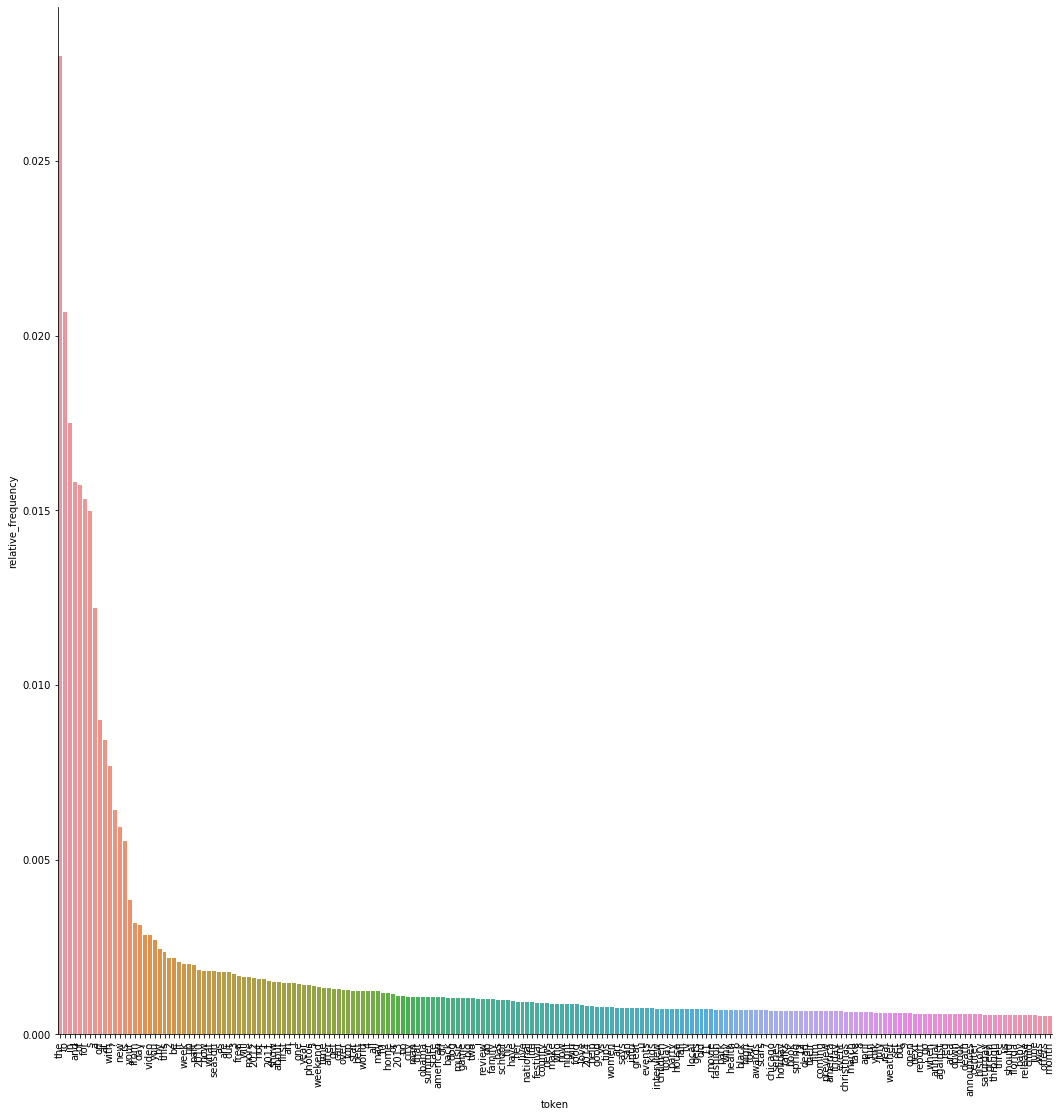

In [96]:
sns.catplot(x='token', y='relative_frequency', kind='bar', data=most_common_200_df, height=15)
plt.xticks(rotation=90, fontweight='light')
plt.show()

## Does the observed relative frequency of these words follow Zipf’s law? Explain.
We can check the 50 and 150th tokens to answer this question

In [102]:
counted_tokens_df.iloc[49]['relative_frequency'] / counted_tokens_df.iloc[149]['relative_frequency'] 

2.12665049851792

From the calculation above, the 50th token's relative frequency is roughly 2.1x more than the 150th token.
From this, we can see that it does not follow Zipf's law because you would expect the 50th token to be 3x more frequent 
than the 150th token.

## In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

